In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['image.cmap'] = "gray"

# Korean fond setting - get font(Malgun Gothic) by absolute path
import matplotlib
fontname = 'Malgun Gothic'
matplotlib.rc('font', family=fontname)
matplotlib.rcParams['axes.unicode_minus'] = False
print(fontname)

# import mglearn in higher directory
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))
import mglearn

C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Malgun Gothic


C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


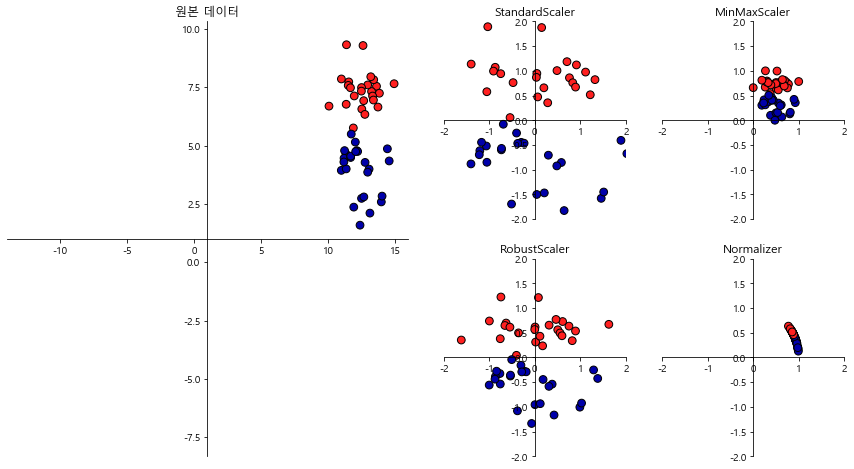

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.389938  , 0.70713561, 0.4119273 , ..., 0.80962199, 0.59957224,
        0.91755006],
       [0.37763264, 0.31755157, 0.36790823, ..., 0.51168385, 0.33174905,
        0.31598672],
       [0.36438071, 0.35238417, 0.35208348, ..., 0.55292096, 0.3476711 ,
        0.28857479],
       ...,
       [0.48364807, 0.50084545, 0.48655933, ..., 0.65257732, 0.4151616 ,
        0.84259557],
       [0.3336173 , 0.3902604 , 0.31787713, ..., 0.27364261, 0.15684411,
        0.22443516],
       [0.28628899, 0.29455529, 0.26826066, ..., 0.17226804, 0.10004753,
        0.06938644]])

##### 고유 얼굴 특성 추출

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [98]:
people

{'data': array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
         22.666666],
       [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
          9.333333],
       [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
         25.666666],
       ...,
       [ 77.333336,  90.333336,  93.333336, ..., 233.66667 , 234.33333 ,
        230.66667 ],
       [ 87.666664,  71.666664,  63.333332, ...,  96.      ,  92.333336,
         96.333336],
       [ 91.      ,  90.666664,  94.666664, ...,  40.333332,  42.333332,
         42.333332]], dtype=float32), 'images': array([[[ 57.       ,  60.333332 ,  78.       , ...,  40.666668 ,
          36.666668 ,  34.       ],
        [ 52.666668 ,  60.       ,  92.       , ...,  46.666668 ,
          36.       ,  30.       ],
        [ 46.       ,  66.       , 113.333336 , ...,  51.       ,
          43.333332 ,  37.666668 ],
        ...,
        [ 61.       ,  62.666668 ,  62.333332 , ...,  19.       ,
   

(3023, 87, 65)


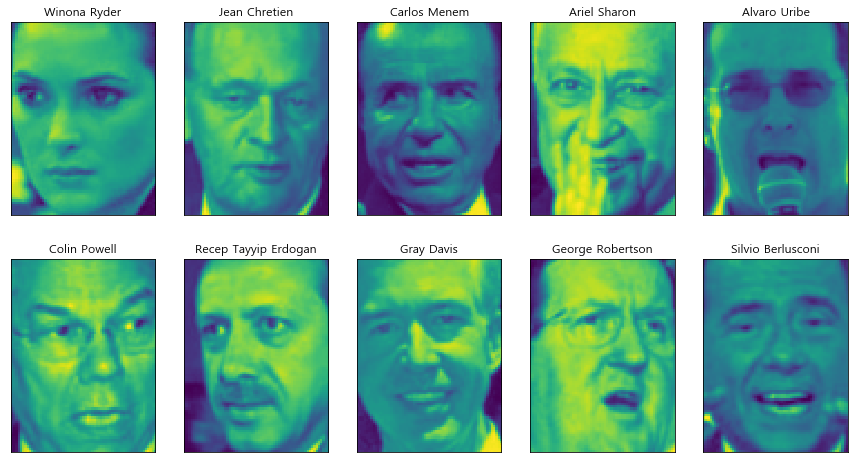

In [95]:
image_shape = people.images.shape
print(image_shape)  # 3023 pictures, 87*65 pixel each (gray scale)

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [97]:
print(people.target[:10])
print(people.target_names[people.target[:10]])

[61 25  9  5  1 10 48 17 13 54]
['Winona Ryder' 'Jean Chretien' 'Carlos Menem' 'Ariel Sharon'
 'Alvaro Uribe' 'Colin Powell' 'Recep Tayyip Erdogan' 'Gray Davis'
 'George Robertson' 'Silvio Berlusconi']


In [114]:
counts = np.bincount(people.target)
counts

for idx, (count, name) in enumerate(zip(counts, people.target_names)):
    print( f'{name:25} {count:3}', end='          ' )
    if (idx+1) % 3 == 0 :
        print()

Alejandro Toledo           39          Alvaro Uribe               35          Amelie Mauresmo            21          
Andre Agassi               36          Angelina Jolie             20          Ariel Sharon               77          
Arnold Schwarzenegger      42          Atal Bihari Vajpayee       24          Bill Clinton               29          
Carlos Menem               21          Colin Powell              236          David Beckham              31          
Donald Rumsfeld           121          George Robertson           22          George W Bush             530          
Gerhard Schroeder         109          Gloria Macapagal Arroyo    44          Gray Davis                 26          
Guillermo Coria            30          Hamid Karzai               22          Hans Blix                  39          
Hugo Chavez                71          Igor Ivanov                20          Jack Straw                 28          
Jacques Chirac             52          Jean Chretien    

In [184]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [185]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

In [179]:
for i in range(3):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))
    pass

1-최근접 이웃의 테스트 세트 점수: 0.23
1-최근접 이웃의 테스트 세트 점수: 0.21
1-최근접 이웃의 테스트 세트 점수: 0.22


In [183]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train:", X_train.shape)
print("X_train_pca.shape:", X_train_pca.shape)

for i in range(3):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train_pca, y_train)
    print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train: (1547, 5655)
X_train_pca.shape: (1547, 100)
테스트 세트 정확도: 0.31
테스트 세트 정확도: 0.27
테스트 세트 정확도: 0.24


In [186]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [187]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

In [188]:
for i in range(3):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))
    pass

1-최근접 이웃의 테스트 세트 점수: 0.23
1-최근접 이웃의 테스트 세트 점수: 0.21
1-최근접 이웃의 테스트 세트 점수: 0.22


In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train:", X_train.shape)
print("X_train_pca.shape:", X_train_pca.shape)

for i in range(3):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train_pca, y_train)
    print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train: (1547, 5655)
X_train_pca.shape: (1547, 100)
테스트 세트 정확도: 0.31
테스트 세트 정확도: 0.27
테스트 세트 정확도: 0.24


In [139]:
# print(people.target[0])
np.where(people.target == 50)
?np.where
# people.target[34]

In [140]:
a = np.zeros(people.target.shape, dtype=np.bool)
a[0] = 1
a

array([ True, False, False, ..., False, False, False])

In [119]:
87*65

5655

In [154]:
np.where(people.target==30)[0][:50]
np.sort(np.bincount(people.target))

array([ 20,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,  22,
        22,  23,  23,  23,  24,  24,  24,  25,  26,  26,  27,  28,  28,
        29,  29,  30,  30,  31,  31,  32,  32,  32,  33,  33,  33,  35,
        36,  37,  39,  39,  41,  41,  42,  42,  44,  48,  49,  52,  52,
        53,  55,  60,  71,  77, 109, 121, 144, 236, 530], dtype=int64)

In [169]:
len(np.unique(people.target)), len(people.target_names)

(62, 62)

21


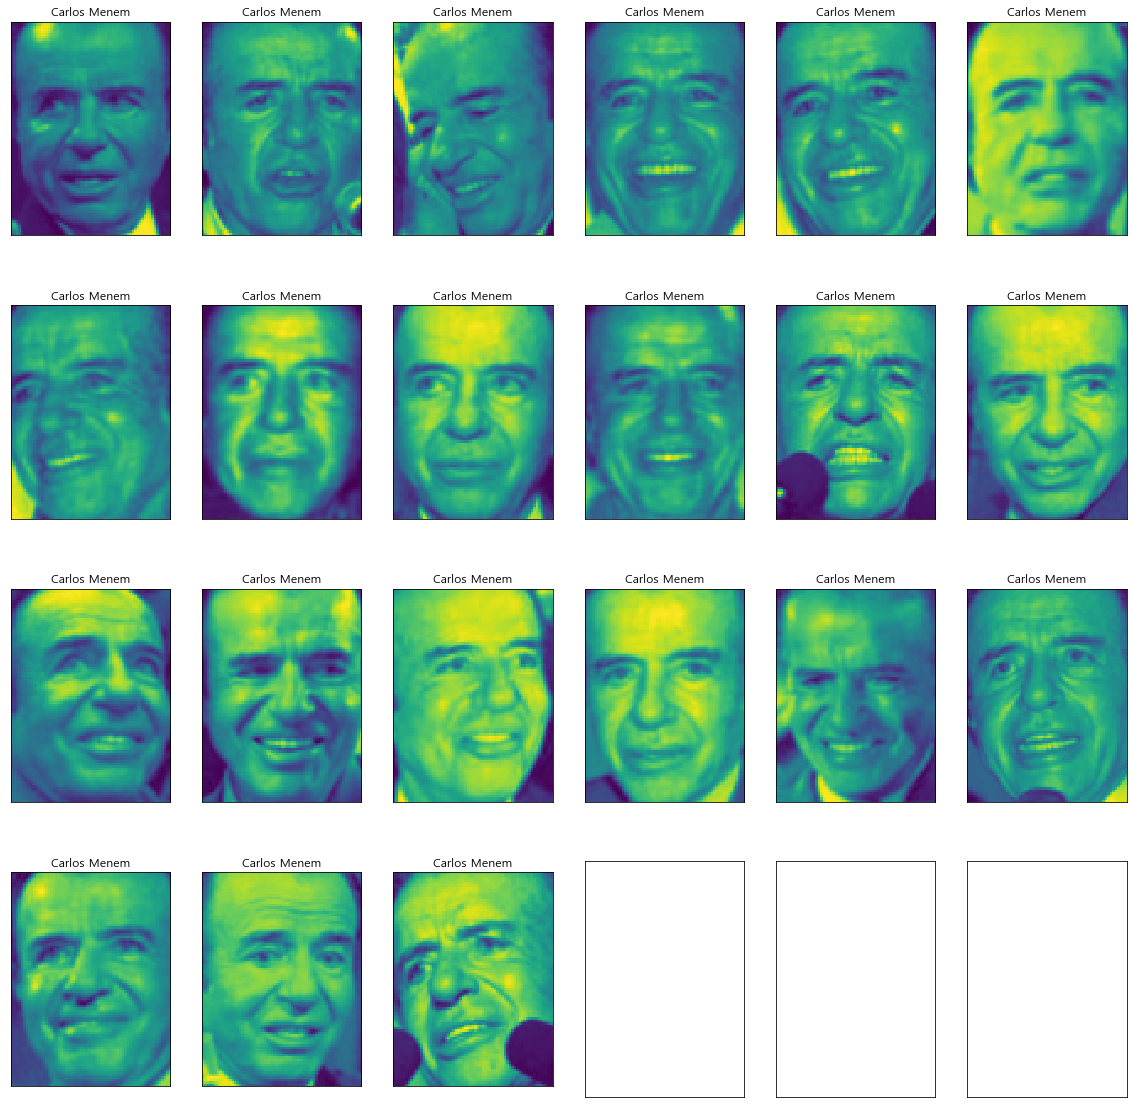

In [175]:
target_idx = people.target[2]
print(len(np.where(people.target == target_idx)[0]))

idx_list = np.where(people.target == target_idx)[0]

fig, axes = plt.subplots(4, 6, figsize=(20, 20), subplot_kw={'xticks': (), 'yticks': ()})
for idx, ax in zip(idx_list, axes.ravel()):
    ax.imshow(people.images[idx])
    ax.set_title(people.target_names[target_idx])